<a href="https://colab.research.google.com/github/veyselalevcan/Marketing_Data_Analysis_RFM_CLTV/blob/main/marketing_data_analysis_rfm_cltv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About Dataset

### Context
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service.

### Content
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response (target)**: 1 if customer accepted the offer in the last campaign, 0 otherwise
- **Complain**: 1 if customer complained in the last 2 years
- **DtCustomer**: Date of customer’s enrolment with the company
- **Education**: Customer’s level of education
- **Marital**: Customer’s marital status
- **Kidhome**: Number of small children in customer’s household
- **Teenhome**: Number of teenagers in customer’s household
- **Income**: Customer’s yearly household income
- **MntFishProducts**: Amount spent on fish products in the last 2 years
- **MntMeatProducts**: Amount spent on meat products in the last 2 years
- **MntFruits**: Amount spent on fruits products in the last 2 years
- **MntSweetProducts**: Amount spent on sweet products in the last 2 years
- **MntWines**: Amount spent on wine products in the last 2 years
- **MntGoldProds**: Amount spent on gold products in the last 2 years
- **NumDealsPurchases**: Number of purchases made with discount
- **NumCatalogPurchases**: Number of purchases made using catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebPurchases**: Number of purchases made through company’s web site
- **NumWebVisitsMonth**: Number of visits to company’s web site in the last month
- **Recency**: Number of days since the last purchase

### Acknowledgements
O. Parr-Rud. *Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner*. SAS Institute, 2014.

### Inspiration
The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.




In [ ]:
!pip install lifetimes

In [ ]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/content/marketing_campaign.csv', sep=';')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df = data.copy()

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(2240, 29)
##################### Types #####################
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response             

In [ ]:
df['Income'].interpolate(method='linear', inplace=True)

In [ ]:
df['Total_Purchases'] = df['NumWebPurchases']  + df['NumStorePurchases']
df['Total_Mnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Purchases,Total_Mnt
0,5524,1957,Graduation,Single,58138.0000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,1617
1,2174,1954,Graduation,Single,46344.0000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3,27
2,4141,1965,Graduation,Together,71613.0000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,18,776
3,6182,1984,Graduation,Together,26646.0000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,6,53
4,5324,1981,PhD,Married,58293.0000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,11,422


In [ ]:
# Tarih sütununu datetime formatına çevirelim
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Analiz tarihi olan 30-06-2014 tarihini datetime formatında tanımlayalım
analysis_date = pd.to_datetime('2014-06-30')
df['T'] = (analysis_date - df['Dt_Customer']).dt.days
df['T'].head()

,T
0,664
1,114
2,313
3,140
4,162


In [ ]:
df['Age'] = 2014 - df['Year_Birth']

df.drop('Year_Birth', axis=1, inplace=True)
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Purchases,Total_Mnt,T,Age
0,5524,Graduation,Single,58138.0000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,1617,664,57
1,2174,Graduation,Single,46344.0000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3,27,114,60
2,4141,Graduation,Together,71613.0000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,18,776,313,49
3,6182,Graduation,Together,26646.0000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,6,53,140,30
4,5324,PhD,Married,58293.0000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,11,422,162,33


In [ ]:
no_accept_ID = df.loc[(df['Response']==0) &
          (df['AcceptedCmp1']==0) &
          (df['AcceptedCmp2']==0) &
          (df['AcceptedCmp3']==0) &
          (df['AcceptedCmp4']==0) &
          (df['AcceptedCmp5']==0), 'ID']

no_accept_ID.to_csv('no_accept_ID.csv', index=False)

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
replace_with_thresholds(df, "Recency")
#replace_with_thresholds(df, "Frequency")

In [ ]:
# Öncelikle veri türlerini düzeltelim
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Recency'] = pd.to_numeric(df['Recency'], errors='coerce')
df['MntWines'] = pd.to_numeric(df['MntWines'], errors='coerce')
df['MntFruits'] = pd.to_numeric(df['MntFruits'], errors='coerce')
df['MntMeatProducts'] = pd.to_numeric(df['MntMeatProducts'], errors='coerce')
df['MntFishProducts'] = pd.to_numeric(df['MntFishProducts'], errors='coerce')
df['MntSweetProducts'] = pd.to_numeric(df['MntSweetProducts'], errors='coerce')
df['MntGoldProds'] = pd.to_numeric(df['MntGoldProds'], errors='coerce')
df['T'] = pd.to_numeric(df['T'], errors='coerce')

# Monetary: Tüm harcama sütunlarını toplayarak toplam harcama miktarını hesaplayalım
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Frequency: Burada, her müşterinin kaç farklı kampanyaya katıldığını ve kaç kez satın alma yaptığını hesaplayacağız
df['Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Recency sütunu zaten veride mevcut

# RFM dataframe'ini oluşturalım
rfm = df[['ID', 'Recency', 'Frequency', 'Monetary', 'T']]
rfm.head()

,ID,Recency,Frequency,Monetary,T
0,5524,58,25,1617,664
1,2174,38,6,27,114
2,4141,26,21,776,313
3,6182,26,8,53,140
4,5324,94,19,422,162


In [ ]:
# CLTV hesaplaması için gerekli metrikler:

# Average Order Value (AOV): Ortalama sipariş değeri
rfm['AOV'] = rfm['Monetary'] / rfm['Frequency']

# Purchase Frequency: Satın alma sıklığı (her müşteri için toplam satın alma sayısı / toplam müşteri sayısı)
purchase_frequency = rfm['Frequency'].sum() / len(rfm)

# Customer Value: Müşteri değeri (Average Order Value * Purchase Frequency)
rfm['Customer_Value'] = rfm['AOV'] * purchase_frequency

# CLTV (Customer Lifetime Value): Müşteri yaşam boyu değeri
# CLTV = Customer Value * (1 / Churn Rate)
# Burada churn rate'i hesaplamadığımız için varsayımsal bir değer kullanacağız. Genelde bu değer 0.1 ile 0.5 arasında olabilir.
churn_rate = 0.2  # varsayımsal churn rate
rfm['CLTV'] = rfm['Customer_Value'] * (1 / churn_rate)

rfm['Recency'] = rfm['Recency'] / 7
rfm['T'] = rfm['T'] / 7

# CLTV sonuçlarına bakalım
rfm.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,ID,Recency,Frequency,Monetary,T,AOV,Customer_Value,CLTV
0,5524,8.2857,25,1617,94.8571,64.6800,961.2776,4806.3881
1,2174,5.4286,6,27,16.2857,4.5000,66.8792,334.3962
2,4141,3.7143,21,776,44.7143,36.9524,549.1883,2745.9413
3,6182,3.7143,8,53,20.0000,6.6250,98.4611,492.3055
4,5324,13.4286,19,422,23.1429,22.2105,330.0940,1650.4702


In [ ]:
rfm = rfm[rfm['Frequency'] != 0]

In [ ]:
##############################################################
# 2. BG-NBD Modelinin Kurulması
##############################################################
# Check and correct for Recency values exceeding T
rfm['Recency'] = np.minimum(rfm['Recency'], rfm['T'])  # Cap Recency at T

bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(rfm['Frequency'],
        rfm['Recency'],
        rfm['T'])

<lifetimes.BetaGeoFitter: fitted with 2236 subjects, a: 1.07, alpha: 0.06, b: 9.68, r: 0.52>

In [ ]:
bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                        rfm['Frequency'],
                                                        rfm['Recency'],
                                                        rfm['T']).sort_values(ascending=False).head(10)


,0
200,38.5838
796,34.2003
1800,30.9853
45,24.8864
1812,22.1940
266,19.6556
463,19.6556
112,17.8321
989,17.3381
1587,15.5812


In [ ]:
################################################################
# 1 hafta içinde en çok satın alma beklediğimiz 10 müşteri kimdir?
################################################################
bgf.predict(1,
            rfm['Frequency'],
            rfm['Recency'],
            rfm['T']).sort_values(ascending=False).head(10)

rfm["expected_purc_1_week"] = bgf.predict(1,
                                          rfm['Frequency'],
                                          rfm['Recency'],
                                          rfm['T'])

rfm['expected_purc_1_week'].sort_values(ascending=False).head(10)

,expected_purc_1_week
200,38.5838
796,34.2003
1800,30.9853
45,24.8864
1812,22.1940
266,19.6556
463,19.6556
112,17.8321
989,17.3381
1587,15.5812


In [ ]:
################################################################
# 1 ay içinde en çok satın alma beklediğimiz 10 müşteri kimdir?
################################################################

bgf.predict(4,
            rfm['Frequency'],
            rfm['Recency'],
            rfm['T']).sort_values(ascending=False).head(10)

rfm["expected_purc_1_month"] = bgf.predict(4,
                                              rfm['Frequency'],
                                              rfm['Recency'],
                                              rfm['T'])


In [ ]:
# 1 ay icinde toplam satıs sayısı
bgf.predict(4,
              rfm['Frequency'],
              rfm['Recency'],
              rfm['T']).sum()

2072.340647865021

In [ ]:
################################################################
# 3 Ayda Tüm Şirketin Beklenen Satış Sayısı Nedir?
################################################################

rfm["expected_purc_3_month"] = bgf.predict(4 * 3,
                                               rfm['Frequency'],
                                               rfm['Recency'],
                                               rfm['T'])

bgf.predict(4 * 3,
            rfm['Frequency'],
            rfm['Recency'],
            rfm['T']).sum()

4020.937762468849

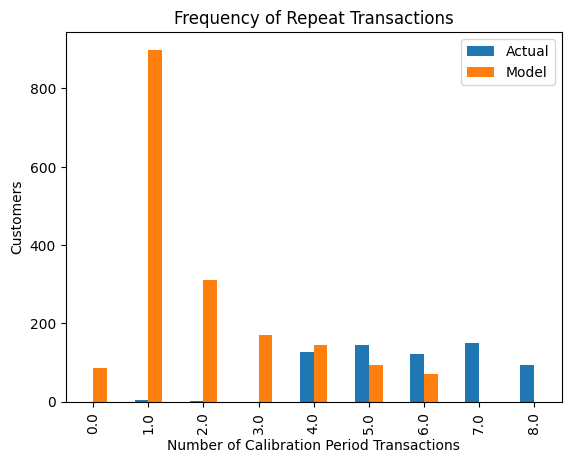

In [ ]:
################################################################
# Tahmin Sonuçlarının Değerlendirilmesi
################################################################

plot_period_transactions(bgf)
plt.show()

In [ ]:
##############################################################
# 3. GAMMA-GAMMA Modelinin Kurulması
##############################################################

ggf = GammaGammaFitter(penalizer_coef=0.01)

ggf.fit(rfm['Frequency'], rfm['Monetary'])

ggf.conditional_expected_average_profit(rfm['Frequency'],
                                        rfm['Monetary']).head(10)

ggf.conditional_expected_average_profit(rfm['Frequency'],
                                        rfm['Monetary']).sort_values(ascending=False).head(10)

rfm["expected_average_profit"] = ggf.conditional_expected_average_profit(rfm['Frequency'],
                                                                         rfm['Monetary'])
rfm.sort_values("expected_average_profit", ascending=False).head(10)

,ID,Recency,Frequency,Monetary,T,AOV,Customer_Value,CLTV,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit
1179,5735,4.1429,18,2525,19.5714,140.2778,2084.8158,10424.0792,0.0000,0.0000,0.0000,2554.6326
1572,5350,4.1429,18,2525,19.5714,140.2778,2084.8158,10424.0792,0.0000,0.0000,0.0000,2554.6326
1492,1763,8.8571,29,2524,48.2857,87.0345,1293.5111,6467.5557,0.0000,0.0000,0.0000,2542.3044
987,4580,6.5714,26,2486,35.4286,95.6154,1421.0410,7105.2048,0.0000,0.0000,0.0000,2506.1277
1052,4475,11.7143,25,2440,71.2857,97.6000,1450.5364,7252.6821,0.0000,0.0000,0.0000,2460.5545
1601,5453,3.7143,24,2352,91.7143,98.0000,1456.4813,7282.4062,0.0000,0.0000,0.0000,2372.6509
1458,10133,2.2857,25,2349,19.7143,93.9600,1396.4386,6982.1928,0.0000,0.0000,0.0000,2368.7928
1288,9010,11.4286,23,2346,72.1429,102.0000,1515.9295,7579.6473,0.0000,0.0000,0.0000,2367.5023
943,5386,8.8571,18,2302,69.0000,127.8889,1900.6915,9503.4576,0.0000,0.0000,0.0000,2329.0316
1301,6024,8.8571,18,2302,69.0000,127.8889,1900.6915,9503.4576,0.0000,0.0000,0.0000,2329.0316


In [ ]:
rfm.shape


(2236, 12)

In [ ]:
##############################################################
# 4. BG-NBD ve GG modeli ile CLTV'nin hesaplanması.
##############################################################

cltv = ggf.customer_lifetime_value(bgf,
                                   rfm['Frequency'],
                                   rfm['Recency'],
                                   rfm['T'],
                                   rfm['Monetary'],
                                   time=3,  # 3 aylık
                                   freq="W",  # T'nin frekans bilgisi.
                                   discount_rate=0.01)

cltv.head()

cltv = cltv.reset_index()
cltv


,index,clv
0,0,0.0000
1,1,1.3590
2,2,0.0000
3,3,0.0026
4,4,2.5029
...,...,...
2231,2235,0.0000
2232,2236,18350.1201
2233,2237,8.4314
2234,2238,0.0000


In [ ]:
cltv_final = pd.concat([cltv, rfm], axis=1)

cltv_final.sort_values(by="clv", ascending=False).head(10)

,index,clv,ID,Recency,Frequency,Monetary,T,AOV,Customer_Value,CLTV,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit
1797,1800.0000,111173.1764,2952.0000,10.7143,8.0000,76.0000,10.7143,9.5000,141.1895,705.9475,0.7252,2.7088,6.9793,78.4406
1707,1710.0000,108820.4795,1045.0000,7.8571,13.0000,279.0000,97.5714,21.4615,318.9625,1594.8127,0.0000,0.0000,0.0000,283.7798
266,266.0000,101678.7255,1225.0000,0.5714,19.0000,1495.0000,0.5714,78.6842,1169.4090,5847.0448,19.6556,43.4842,66.4757,1511.6817
463,463.0000,101678.7255,7059.0000,0.5714,19.0000,1495.0000,0.5714,78.6842,1169.4090,5847.0448,19.6556,43.4842,66.4757,1511.6817
1656,1659.0000,93485.4432,2285.0000,0.0000,15.0000,335.0000,56.8571,22.3333,331.9192,1659.5960,0.0000,0.0000,0.0000,339.9191
1484,1486.0000,73533.6779,8370.0000,7.1429,18.0000,1159.0000,99.5714,64.3889,956.9511,4784.7556,0.0000,0.0000,0.0000,1172.7004
795,796.0000,71983.6900,199.0000,4.7143,13.0000,315.0000,75.1429,24.2308,360.1190,1800.5950,0.0000,0.0000,0.0000,320.3638
1267,1269.0000,71827.6080,11114.0000,13.4286,9.0000,84.0000,72.4286,9.3333,138.7125,693.5625,0.0000,0.0000,0.0000,86.3518
45,45.0000,70025.7457,1371.0000,0.2857,16.0000,984.0000,0.2857,61.5000,914.0163,4570.0815,24.8864,48.7411,69.6402,997.1358
53,53.0000,59778.8223,2225.0000,3.2857,21.0000,1617.0000,3.2857,77.0000,1144.3781,5721.8906,5.5952,17.6311,35.6026,1633.2947


In [ ]:
##############################################################
# 5. CLTV'ye Göre Segmentlerin Oluşturulması
##############################################################

cltv_final

cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])

cltv_final.sort_values(by="clv", ascending=False).head(50)


,index,clv,ID,Recency,Frequency,Monetary,T,AOV,Customer_Value,CLTV,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,segment
1797,1800.0000,111173.1764,2952.0000,10.7143,8.0000,76.0000,10.7143,9.5000,141.1895,705.9475,0.7252,2.7088,6.9793,78.4406,A
1707,1710.0000,108820.4795,1045.0000,7.8571,13.0000,279.0000,97.5714,21.4615,318.9625,1594.8127,0.0000,0.0000,0.0000,283.7798,A
266,266.0000,101678.7255,1225.0000,0.5714,19.0000,1495.0000,0.5714,78.6842,1169.4090,5847.0448,19.6556,43.4842,66.4757,1511.6817,A
463,463.0000,101678.7255,7059.0000,0.5714,19.0000,1495.0000,0.5714,78.6842,1169.4090,5847.0448,19.6556,43.4842,66.4757,1511.6817,A
1656,1659.0000,93485.4432,2285.0000,0.0000,15.0000,335.0000,56.8571,22.3333,331.9192,1659.5960,0.0000,0.0000,0.0000,339.9191,A
1484,1486.0000,73533.6779,8370.0000,7.1429,18.0000,1159.0000,99.5714,64.3889,956.9511,4784.7556,0.0000,0.0000,0.0000,1172.7004,A
795,796.0000,71983.6900,199.0000,4.7143,13.0000,315.0000,75.1429,24.2308,360.1190,1800.5950,0.0000,0.0000,0.0000,320.3638,A
1267,1269.0000,71827.6080,11114.0000,13.4286,9.0000,84.0000,72.4286,9.3333,138.7125,693.5625,0.0000,0.0000,0.0000,86.3518,A
45,45.0000,70025.7457,1371.0000,0.2857,16.0000,984.0000,0.2857,61.5000,914.0163,4570.0815,24.8864,48.7411,69.6402,997.1358,A
53,53.0000,59778.8223,2225.0000,3.2857,21.0000,1617.0000,3.2857,77.0000,1144.3781,5721.8906,5.5952,17.6311,35.6026,1633.2947,A


In [ ]:
cltv_final.groupby("segment").agg(
    {"count", "mean", "sum"})

index                          clv                           ID                   Recency              Frequency                  Monetary                         T                      AOV               Customer_Value                        CLTV                 expected_purc_1_week              expected_purc_1_month              expected_purc_3_month              expected_average_profit               
                sum      mean count          sum      mean count          sum      mean count       sum   mean count       sum    mean count         sum     mean count        sum    mean count        sum    mean count            sum     mean count          sum      mean count                  sum   mean count                   sum   mean count                   sum   mean count                     sum     mean count
segment                                                                                                                                                                                                                                                                                                                                                                                                                            
D       623786.0000 1115.8962   559       0.0000    0.0000   559 3162797.0000 5657.9553   559 3320.8571 5.9407   559 9544.0000 17.0733   559 406097.0000 726.4705   559 30891.2857 55.2617   559 20367.1514 36.4350   559    302697.6951 541.4986   559 1513488.4757 2707.4928   559             179.5978 0.3213   559              477.3401 0.8539   559              897.3505 1.6053   559             410526.0866 734.3937   559
C       625960.0000 1119.7853   559       0.0000    0.0000   559 3181448.0000 5711.7558   557 3831.5714 6.8789   557 8741.0000 15.6930   557 364082.0000 653.6481   557 29917.1429 53.7112   557 19558.6878 35.1143   557    290682.2666 521.8712   557 1453411.3330 2609.3561   557             123.8930 0.2224   557              363.0838 0.6519   557              725.1110 1.3018   557             368350.3117 661.3112   557
B       615398.0000 1100.8909   559       1.0564    0.0019   559 3035882.0000 5440.6487   558 3924.8571 7.0338   558 7365.0000 13.1989   558 290760.0000 521.0753   558 28456.5714 50.9974   558 17930.0125 32.1326   558    266476.8066 477.5570   558 1332384.0328 2387.7850   558             103.4619 0.1854   558              300.6935 0.5389   558              609.0056 1.0914   558             294830.7820 528.3706   558
A       637244.0000 1139.9714   559 2708876.2788 4845.9325   559 3085599.0000 5529.7473   558 3943.8571 7.0678   558 7566.0000 13.5591   558 293324.0000 525.6703   558 23936.2857 42.8966   558 16534.4321 29.6316   558    245735.6156 440.3864   558 1228678.0778 2201.9320   558             338.3535 0.6064   558              910.9042 1.6324   558             1749.5812 3.1355   558             297029.0313 532.3101   558